In [1]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

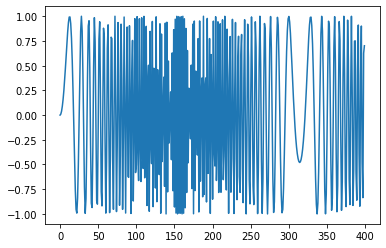

In [2]:
series = np.sin((0.1 * np.arange(400)) ** 2)
                
plt.plot(series)
plt.show()

In [3]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t: t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [4]:
X = np.array(X).reshape(-1, T) # N x T D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10) Y.shape (390,)


## Autoregressive

In [5]:
# Autogressive RNN model
i = Input(shape=(T, ))
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.01))

r = model.fit(
    X[:-N//2], 
    Y[:-N//2], 
    epochs=80, 
    validation_data=(X[-N//2:], Y[-N//2:])
)

Train on 195 samples, validate on 195 samples
Epoch 1/80
195/195 [==============================] - 0s 1ms/sample - loss: 0.8985 - val_loss: 1.0892
Epoch 2/80
195/195 [==============================] - 0s 72us/sample - loss: 0.7966 - val_loss: 1.0096
Epoch 3/80
195/195 [==============================] - 0s 77us/sample - loss: 0.7281 - val_loss: 0.9289
Epoch 4/80
195/195 [==============================] - 0s 72us/sample - loss: 0.6716 - val_loss: 0.8714
Epoch 5/80
195/195 [==============================] - 0s 77us/sample - loss: 0.6324 - val_loss: 0.8139
Epoch 6/80
195/195 [==============================] - 0s 77us/sample - loss: 0.6009 - val_loss: 0.7517
Epoch 7/80
195/195 [==============================] - 0s 82us/sample - loss: 0.5699 - val_loss: 0.7056
Epoch 8/80
195/195 [==============================] - 0s 77us/sample - loss: 0.5466 - val_loss: 0.6833
Epoch 9/80
195/195 [==============================] - 0s 77us/sample - loss: 0.5278 - val_loss: 0.6653
Epoch 10/80
195/195 [=======

195/195 [==============================] - 0s 82us/sample - loss: 0.4873 - val_loss: 0.6054
Epoch 80/80
195/195 [==============================] - 0s 77us/sample - loss: 0.4879 - val_loss: 0.6053


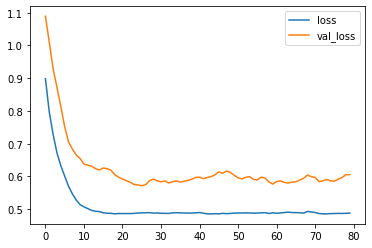

In [6]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [7]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

(390, 1)


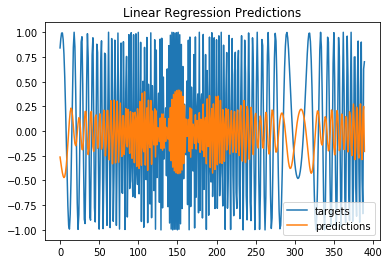

In [8]:
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()

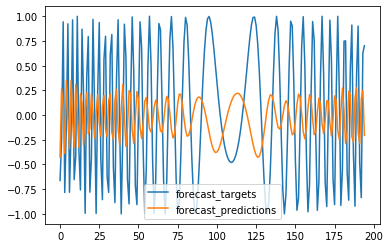

In [9]:
# "Wrong" forecast using true targets
validation_target = Y[-N//2:]
validation_predictions = []

# input of first vlidation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1

  # update the predictions list
  validation_predictions.append(p)

plt.plot(validation_target, label='forecast_targets')
plt.plot(validation_predictions, label='forecast_predictions')
plt.legend()

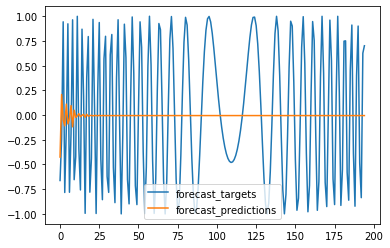

In [10]:
# Multi-step forecast (using last_x)
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
    i += 1

    # update the predictions list
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
    
plt.plot(validation_target, label='forecast_targets')
plt.plot(validation_predictions, label='forecast_predictions')
plt.legend()

## Create model (RNN)

In [11]:
# New try RNN/LSTM model 
X.shape

(390, 10)

In [12]:
X = X.reshape(-1, T, 1) # N x T x D
X.shape

(390, 10, 1)

In [13]:
i = Input(shape=(T, D))
x = SimpleRNN(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.05)
)

In [14]:
# Train the RNN
r = model.fit(X[:-N//2], Y[:-N//2],
         batch_size=32,
         epochs=80,
         validation_data=(X[-N//2:], Y[-N//2:]))

Train on 195 samples, validate on 195 samples
Epoch 1/80
195/195 [==============================] - 1s 4ms/sample - loss: 0.6365 - val_loss: 0.5729
Epoch 2/80
195/195 [==============================] - 0s 185us/sample - loss: 0.5110 - val_loss: 0.6694
Epoch 3/80
195/195 [==============================] - 0s 179us/sample - loss: 0.4836 - val_loss: 0.7063
Epoch 4/80
195/195 [==============================] - 0s 231us/sample - loss: 0.4224 - val_loss: 0.5941
Epoch 5/80
195/195 [==============================] - 0s 215us/sample - loss: 0.3743 - val_loss: 0.4780
Epoch 6/80
195/195 [==============================] - 0s 190us/sample - loss: 0.3478 - val_loss: 0.4463
Epoch 7/80
195/195 [==============================] - 0s 185us/sample - loss: 0.3335 - val_loss: 0.4905
Epoch 8/80
195/195 [==============================] - 0s 185us/sample - loss: 0.3466 - val_loss: 0.2766
Epoch 9/80
195/195 [==============================] - 0s 185us/sample - loss: 0.2116 - val_loss: 0.3529
Epoch 10/80
195/195 

195/195 [==============================] - 0s 159us/sample - loss: 0.0330 - val_loss: 0.0524
Epoch 79/80
195/195 [==============================] - 0s 169us/sample - loss: 0.0265 - val_loss: 0.0628
Epoch 80/80
195/195 [==============================] - 0s 164us/sample - loss: 0.0202 - val_loss: 0.0563


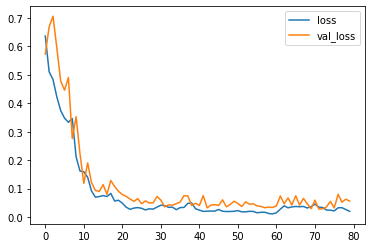

In [15]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [16]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

(390, 1)


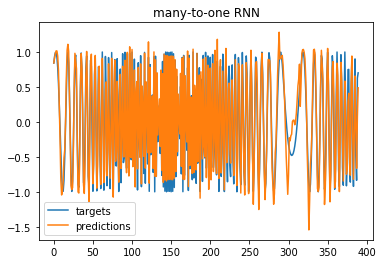

In [17]:
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

In [18]:
# Multi-step forecast
'''
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
'''
forecast = []
last_x = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
    new_p = model.predict(last_x.reshape(1, T, 1))[0,0]
    forecast.append(new_p)
    
    last_x = np.roll(last_x, -1)
    last_x[-1] = new_p
    

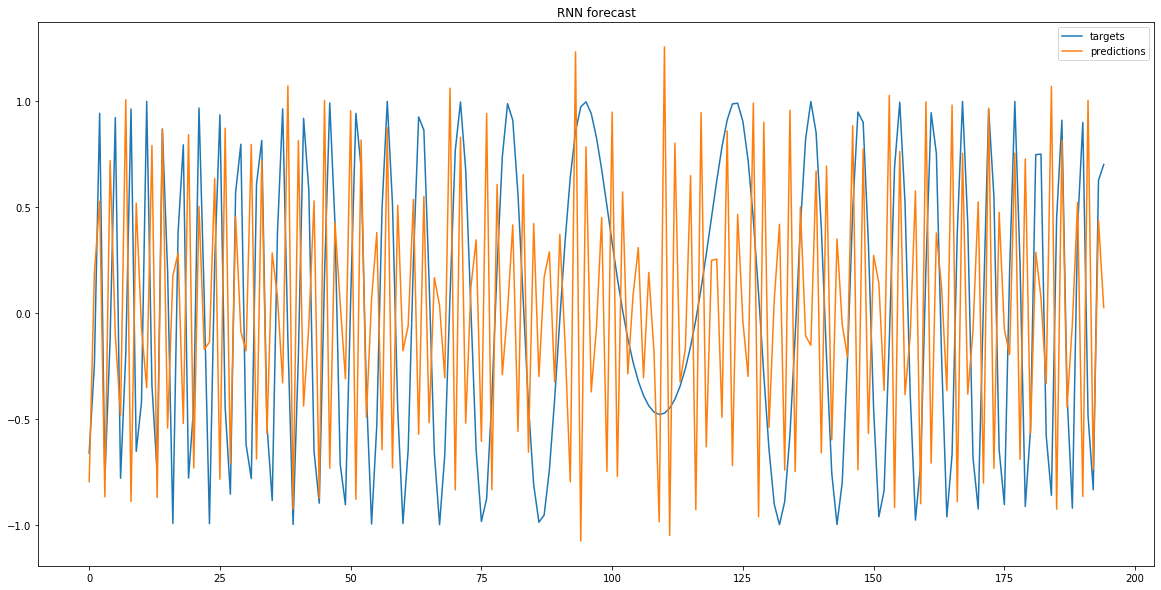

In [19]:
plt.figure(figsize=(20, 10))
plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='predictions')
plt.title("RNN forecast")
plt.legend()
plt.show()

## Create model (LSTM)

In [20]:
# create model (using LSTM)
X = X.reshape(-1, T, 1) # N x T x D

# model LSTM
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)

model.compile(
    loss='mse',
    optimizer=Adam(lr=0.05)
)

# Train the RNN(LSTM)
r = model.fit(X[:-N//2], Y[:-N//2],
         batch_size=32,
         epochs=200,
         validation_data=(X[-N//2:], Y[-N//2:]))

Train on 195 samples, validate on 195 samples
Epoch 1/200
195/195 [==============================] - 2s 8ms/sample - loss: 0.5312 - val_loss: 0.5826
Epoch 2/200
195/195 [==============================] - 0s 252us/sample - loss: 0.4731 - val_loss: 0.6198
Epoch 3/200
195/195 [==============================] - 0s 251us/sample - loss: 0.4290 - val_loss: 0.5413
Epoch 4/200
195/195 [==============================] - 0s 275us/sample - loss: 0.3460 - val_loss: 0.4150
Epoch 5/200
195/195 [==============================] - 0s 248us/sample - loss: 0.2766 - val_loss: 0.3668
Epoch 6/200
195/195 [==============================] - 0s 243us/sample - loss: 0.2312 - val_loss: 0.3408
Epoch 7/200
195/195 [==============================] - 0s 248us/sample - loss: 0.1768 - val_loss: 0.2145
Epoch 8/200
195/195 [==============================] - 0s 246us/sample - loss: 0.0869 - val_loss: 0.1301
Epoch 9/200
195/195 [==============================] - 0s 247us/sample - loss: 0.0748 - val_loss: 0.1133
Epoch 10/20

Epoch 78/200
195/195 [==============================] - 0s 251us/sample - loss: 0.0023 - val_loss: 0.0469
Epoch 79/200
195/195 [==============================] - 0s 251us/sample - loss: 0.0033 - val_loss: 0.0279
Epoch 80/200
195/195 [==============================] - 0s 261us/sample - loss: 0.0035 - val_loss: 0.0386
Epoch 81/200
195/195 [==============================] - 0s 236us/sample - loss: 0.0023 - val_loss: 0.0357
Epoch 82/200
195/195 [==============================] - 0s 246us/sample - loss: 0.0017 - val_loss: 0.0336
Epoch 83/200
195/195 [==============================] - 0s 241us/sample - loss: 0.0014 - val_loss: 0.0362
Epoch 84/200
195/195 [==============================] - 0s 236us/sample - loss: 0.0016 - val_loss: 0.0357
Epoch 85/200
195/195 [==============================] - 0s 241us/sample - loss: 0.0016 - val_loss: 0.0307
Epoch 86/200
195/195 [==============================] - 0s 241us/sample - loss: 0.0014 - val_loss: 0.0405
Epoch 87/200
195/195 [========================

Epoch 155/200
195/195 [==============================] - 0s 241us/sample - loss: 0.0045 - val_loss: 0.0495
Epoch 156/200
195/195 [==============================] - 0s 241us/sample - loss: 0.0032 - val_loss: 0.0356
Epoch 157/200
195/195 [==============================] - 0s 246us/sample - loss: 0.0038 - val_loss: 0.0414
Epoch 158/200
195/195 [==============================] - 0s 241us/sample - loss: 0.0095 - val_loss: 0.0519
Epoch 159/200
195/195 [==============================] - 0s 241us/sample - loss: 0.0098 - val_loss: 0.0689
Epoch 160/200
195/195 [==============================] - 0s 241us/sample - loss: 0.0136 - val_loss: 0.0548
Epoch 161/200
195/195 [==============================] - 0s 239us/sample - loss: 0.0221 - val_loss: 0.0301
Epoch 162/200
195/195 [==============================] - 0s 231us/sample - loss: 0.0140 - val_loss: 0.0580
Epoch 163/200
195/195 [==============================] - 0s 239us/sample - loss: 0.0164 - val_loss: 0.0253
Epoch 164/200
195/195 [==============

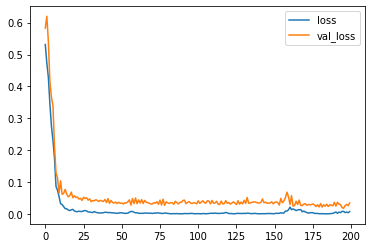

In [21]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
# One-strp
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one RNN(LSTM)")
plt.legend()
plt.show()

In [ ]:
# Multi-step forecast
forecast = []
last_x = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
    new_p = model.predict(last_x.reshape(1, T, 1))[0,0]
    forecast.append(new_p)
    
    last_x = np.roll(last_x, -1)
    last_x[-1] = new_p

# plt.figure(figsize=(20, 10))
plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='predictions')
plt.title("RNN(LSTM) forecast")
plt.legend()
plt.show()